In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# def laplacian_of_gaussian(image, sigma):
#     """Apply Laplacian of Gaussian (LoG) filter."""
#     # Create Gaussian kernel
#     size = int(2 * np.ceil(3 * sigma) + 1)  # kernel size
#     gaussian_kernel = cv.getGaussianKernel(size, sigma)
#     gaussian_kernel = gaussian_kernel @ gaussian_kernel.T  # 2D kernel
#     log_kernel = cv.Laplacian(gaussian_kernel, cv.CV_64F)
#     filtered_image = cv.filter2D(image, cv.CV_64F, log_kernel)
#     return filtered_image

def laplacian_of_gaussian(sigma: float) -> np.ndarray:

    size = int(2 * np.ceil(3 * sigma) + 1)
    print("size", size)
        
    # Create a grid of (x, y) coordinates
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)

    # Compute the Laplacian of Gaussian
    laplacian = (x**2 + y**2 - 2 * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    plt.imshow(laplacian, cmap='gray')
    plt.title('laplacian of Gaussian Kernel')
    plt.axis('off')
    plt.colorbar()
    plt.show()


    # Normalize the LoG kernel
    # Plot in 3-D
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.plot_surface(x, y, laplacian, cmap='coolwarm')
    # ax.set_title('2D Gaussian Kernel')
    # ax.set_xlabel('X-axis')
    # ax.set_ylabel('Y-axis')
    # ax.set_zlabel('G(X,Y)')
    # plt.show()
    
    return laplacian 

size 5


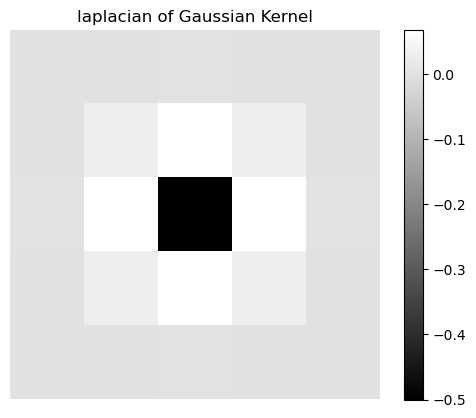

[[ 8.44013810e-07  2.04299684e-04  1.17411920e-03  2.04299684e-04
   8.44013810e-07]
 [ 2.04299684e-04  2.74734583e-02  6.76676416e-02  2.74734583e-02
   2.04299684e-04]
 [ 1.17411920e-03  6.76676416e-02 -5.00000000e-01  6.76676416e-02
   1.17411920e-03]
 [ 2.04299684e-04  2.74734583e-02  6.76676416e-02  2.74734583e-02
   2.04299684e-04]
 [ 8.44013810e-07  2.04299684e-04  1.17411920e-03  2.04299684e-04
   8.44013810e-07]]


In [46]:
print(laplacian_of_gaussian(0.5))

In [47]:
def find_scale_space_extrema(image, sigmas):
    """Detect circles by finding extrema in the scale-space."""
    # Store results
    detected_circles = []
    
    # Loop through different sigma values
    for sigma in sigmas:
        laplacian_kernel = laplacian_of_gaussian(sigma)

        filtered_image = cv.filter2D(image, cv.CV_64F, laplacian_kernel)

        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.title('filtered_image')
        # plt.imshow(filtered_image)
        # plt.axis('off')


        
        # Normalize the filtered image
        filtered_image = cv.normalize(filtered_image, None, 0, 255, cv.NORM_MINMAX)

        # plt.subplot(1, 2, 1)
        # plt.title('filtered_image')
        # plt.imshow(filtered_image)
        # plt.axis('off')
        
        

        # Threshold to find strong responses
        # Use Otsu's method to find the optimal threshold
        _, thresh_image = cv.threshold(np.uint8(filtered_image), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)


        # plt.figure(figsize=(10, 5))
        # plt.subplot(1, 2, 1)
        # plt.title('thresh_image')
        # plt.imshow(thresh_image)
        # plt.axis('off')
        # plt.show()
        
        # Find contours in the thresholded image
        contours, _ = cv.findContours(thresh_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


        
        # Iterate through contours to find circles
        for contour in contours:
            if len(contour) >= 5:  # Need at least 5 points to fit a circle
                (x, y), radius = cv.minEnclosingCircle(contour)
                detected_circles.append((int(x), int(y), int(radius), sigma))
        contours = []       
    print("Hello")            
    print(detected_circles)            
    
    return detected_circles

size 5


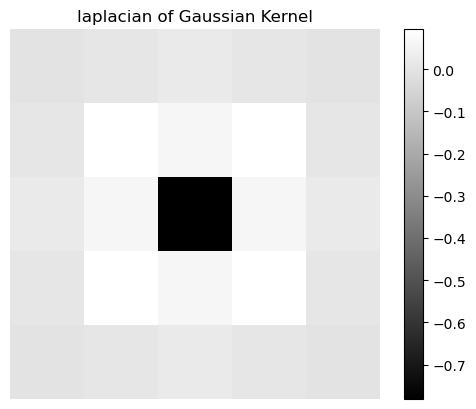

Hello
[(337, 357, 1, 0.625), (123, 357, 1, 0.625), (116, 357, 3, 0.625), (102, 357, 3, 0.625), (206, 357, 2, 0.625), (181, 356, 1, 0.625), (341, 356, 2, 0.625), (271, 356, 3, 0.625), (189, 355, 1, 0.625), (106, 355, 1, 0.625), (3, 356, 2, 0.625), (296, 355, 3, 0.625), (302, 353, 2, 0.625), (162, 355, 8, 0.625), (107, 352, 2, 0.625), (318, 354, 6, 0.625), (269, 353, 4, 0.625), (197, 350, 1, 0.625), (110, 351, 1, 0.625), (350, 352, 4, 0.625), (300, 349, 2, 0.625), (114, 349, 2, 0.625), (194, 348, 1, 0.625), (64, 353, 8, 0.625), (243, 352, 10, 0.625), (186, 347, 2, 0.625), (169, 347, 3, 0.625), (75, 346, 2, 0.625), (259, 348, 6, 0.625), (234, 346, 3, 0.625), (173, 347, 4, 0.625), (164, 344, 1, 0.625), (77, 351, 8, 0.625), (205, 346, 12, 0.625), (191, 347, 5, 0.625), (22, 350, 12, 0.625), (297, 341, 1, 0.625), (180, 346, 6, 0.625), (350, 348, 9, 0.625), (313, 343, 4, 0.625), (170, 340, 4, 0.625), (301, 342, 8, 0.625), (27, 340, 5, 0.625), (250, 338, 3, 0.625), (72, 338, 3, 0.625), (37, 346

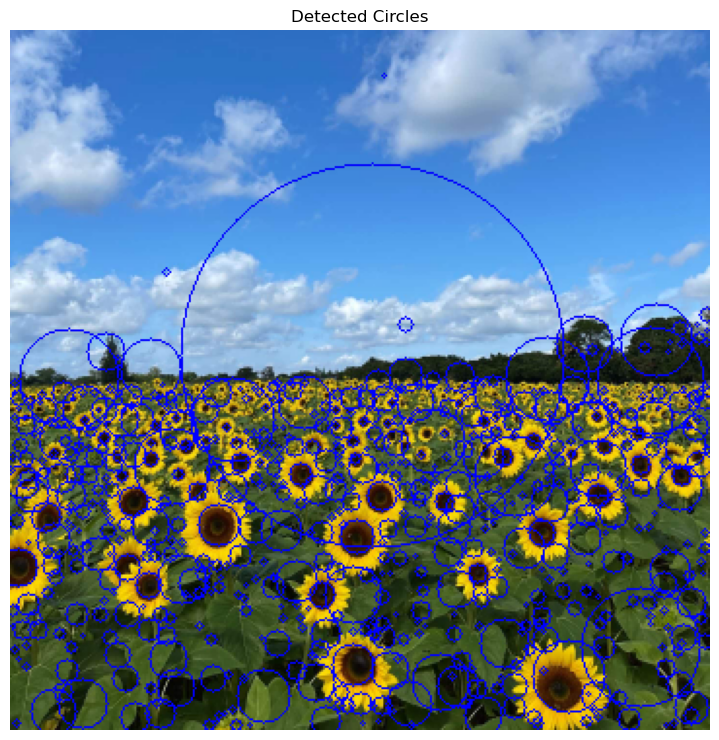

Range of sigma values used: 0.625 to 0.625


In [48]:
# Load the image
im = cv.imread('../images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
if im is None:
    raise FileNotFoundError("Image not found. Please check the file path.")

# Convert to grayscale
gray_im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define the range of sigma values
sigmas = np.linspace(0.625, 1, 1)  # You can adjust the range and number of values

# Find circles in the image
detected_circles = find_scale_space_extrema(gray_im, sigmas)

# Report the parameters of the largest circles
largest_circles = sorted(detected_circles, key=lambda x: x[2], reverse=True)[:5]  # Get the largest 5 circles

print("Parameters of the largest circles (x, y, radius, sigma):")
for circle in largest_circles:
    print(circle)

# Draw the detected circles
output_image = im.copy()
for (x, y, radius, sigma) in detected_circles:
    cv.circle(output_image, (x, y), radius, (255, 0, 0), 1)
    

# Display the original image and the output image
plt.figure(figsize=(20, 20))
# plt.subplot(2, 1, 1)
# plt.title('Original Image')
# plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
# plt.axis('off')

plt.subplot(2, 1, 1)
plt.title('Detected Circles')
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# Report the range of sigma values used
print(f"Range of sigma values used: {sigmas[0]} to {sigmas[-1]}")